# Project 2D

### Scientific Question: Is there a correlation between UV exposure and the rate melanoma diagnoses in men and women across the world? 
NASA'S use of the ozone mapping spectrometer has revealed that UV radiation levels vary across the world. Studies have shown this variation is in response to solar elevation, cloud and snow reflection, altitude, aerosols, and elliptical orbit of the Earth around the Sun (Liley and Mckenzie, 2006).

Melanoma is a tumor that is generated when melanocytes become malignant. Melanocytes are responsible for producing the melanin in our bodies to display physical features such as eye, hair, and skin color. Research has shown that people who are more suseptable to having Melanoma are those who are consistently exposed to the sun, especially without sunscreen (Heistein and Acharya, 2021).

Studies have also pointed to how individuals with lighter skin complexion, with the phenomelanin pigment, are more vunerable to developing Melanoma. The minimal erythematous (MED) dose method has been used to evaluate how much UV radiation is needed to induce sunburn. A much higher dose of (MED) is needed in individuals with darker complextion to induce suburn,because have the eumelanin pigment, which is less sensitive to UV (D'Orazio et al., 2013).



### Hypothesis: If there is high exposure to UV radiation in a given location, then we can expect to see high rate of melanoma in both men and women. 

High exposure to UV radiation has been shown to lead to specific mutations in our genes causing severe skin damage. On the molecular level, the mitogen-activated protein kinase pathway is most often mutated by UV radiation. In this pathway, the genes often affected are BRAF, NRAS, and NF1. There are two forms of UV Radiation, UVB and UVA. "UVB causes DNA lesions directly" whereas "UVA excites intracellular photosensitizers and the subsequent production of reactive oxygen species to induce DNA damage"(Craig et al., 2018).

To answer this scientific question and test my hypothesis, I searched for UV radiation levels across different countries in the world on the World Health Organization Website. I also searched for the rates of Melanoma for men and women (30+ yrs) on the American Institute for Cancer Research. I then transfered both forms of data onto Excel and turned them into a csv file. That is the data I used here. 

## Part 1: Load Packages

- Pandas: This is an open source data analysis and manipulation tool that can be used in Python. You can create DataFrames and it will provide tools for reading and writing data in different formats.It also allows you to merge, reshape, insert and delete columns in datasets. To learn more about Pandas, see: https://pandas.pydata.org/about/index.html

- Plotly.express: This is a refined source within Plotly used to style and create different figures that may be basic, 2D, 3D, multidimensional, and even in the form of a a Polar Chart. The high level API for these functions makes it easy to transition to different types of figures. To learn more about Plotly.express, see: https://plotly.com/python/plotly-express/

- Plotly: This is an open source graphing library used to create a variety of different graphs such as line plots, scatter plots, bar charts, and even heat maps. To learn more about Plotly, see: https://plotly.com/python/

- Statistics: This is a module in Python that allows you to calculate mathmatical statistics to numerical data. THis includes calculating the mean, median, mode, standard deviation and more. To learn more about Statistics, see: https://docs.python.org/3/library/statistics.html

- numpy: This is a package that is used for scientific computing in Python. You can use it to create multi-dimensional arrays and matrices. Several mathmatical opperations can be performed in these arrays with large amounts of data. To learn more about numpy, see: https://numpy.org/doc/stable/user/whatisnumpy.html

- matplotlib.pyplot: This is a source within matplotlib that consists of functions that work similarly to Matlab. You can use it create figures more in detail by incorporating labels, lines, and can specify axes. To learn more about matplotlib.pyplot, see: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

- SciPy: This is a package created on the extension of NumPy that can be used for manipulating and visualizing data. SciPy has subpackages to create N-dimensional images, spatial data structures, statistical distributions, clustering algorithms and much more. To learn more about SciPy, see: https://docs.scipy.org/doc/scipy/reference/tutorial/general.html


In [53]:
#Import all necessary packages
import pandas as pd
!pip install plotly
import plotly as px

In [54]:
#Continue import of packages
import plotly.express as px
from statistics import mean, stdev
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Part 2A: Load in the data and perform Bioinformatics Analyses (GeoComputational Analyses)
The type of data that is used below is in a CSV file. A CSV file is a comma separated value format that can be used to import or export in databases or spreadsheets. The CSV files contain the coordinates for various countries around the world. Another CSV file contains UV radiation levels for the given countries.  

In the code below we read the CSV file to produce a dataframe for the Country coordinates and a dataframe for UV radiation levels. These dataframes are then merged into one dataframe 'world_stats'. To retrieve country codes to finalize the data needed to produce a figure, use the given dataframe from "year 2007" to create 'new_world'. Then merge to create the final dataframe. 

In [55]:
#Read csv file to produce dataframe
#global variable CountryCoordinates
CountryCoordinates = pd.read_csv("CountryCoordinates.csv")

#Check to verify dataframe contents
CountryCoordinates.head()

,abbreviation,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [56]:
#Read csv file to produce dataframe
#Global varaible UVRadiation
UVRadiation = pd.read_csv("UVRadiation.csv")

#Check to verify dataframe contents
UVRadiation.head()

,Country,UV radiation
0,Afghanistan,4132
1,Albania,2542
2,Algeria,3253
3,Andorra,2469
4,Angola,5287


In [57]:
#Merged the two dataframe for CountryCoordinates and UVRadiation
#Left_on is what column is on the left, and right_on is what column will be placed on the right
world_stats = pd.merge(CountryCoordinates, UVRadiation, left_on='country', right_on='Country')

#Check to verify dataframe was properly merged
world_stats.head()

,abbreviation,latitude,longitude,country,Country,UV radiation
0,AD,42.546245,1.601554,Andorra,Andorra,2469
1,AE,23.424076,53.847818,United Arab Emirates,United Arab Emirates,4862
2,AF,33.939110,67.709953,Afghanistan,Afghanistan,4132
3,AG,17.060816,-61.796428,Antigua and Barbuda,Antigua and Barbuda,5148
4,AL,41.153332,20.168331,Albania,Albania,2542


In [58]:
#This dataframe is needed to produce a complete world map because it contains the "iso_alpha" values for each country
#local variable year==2007
df = px.data.gapminder().query("year==2007")

#Merged world_stats contents with that from "df" to retrieve "iso_alpha"
#Set merged contents equal to new_world
#Global variable new_world
new_world = pd.merge(world_stats, df, left_on='Country', right_on='country')

#Check to verify new dataframe was properly merged
new_world

,abbreviation,latitude,longitude,country_x,Country,UV radiation,country_y,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,AF,33.939110,67.709953,Afghanistan,Afghanistan,4132,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
1,AL,41.153332,20.168331,Albania,Albania,2542,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
2,AO,-11.202692,17.873887,Angola,Angola,5287,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
3,AR,-38.416097,-63.616672,Argentina,Argentina,3476,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
4,AT,47.516231,14.550072,Austria,Austria,1888,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,UG,1.373333,32.290275,Uganda,Uganda,5499,Uganda,Africa,2007,51.542,29170398,1056.380121,UGA,800
111,UY,-32.522779,-55.765835,Uruguay,Uruguay,3235,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858
112,ZA,-30.559482,22.937506,South Africa,South Africa,4111,South Africa,Africa,2007,49.339,43997828,9269.657808,ZAF,710
113,ZM,-13.133897,27.849332,Zambia,Zambia,5265,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


## Project 2B: Show the Choropleth associated with Geocomputational Analyses
A choropleth is a map used to represent a quantity of something in the form of colored polygons. The colors in the figure below reresent UV radiation levels. The greater the value, the stronger the UV radiation level.

In [59]:
#Set figure equal to choropleth of new_world
fig = px.choropleth(new_world, 

#Set locations equal to iso_alpha for country code to produce map                   
locations="iso_alpha",

#Instruct designated color on map to represent UV Radiation percentages(PAF)
color="UV radiation", 

#Set the name of each country as the variable that will display when hovering over map
hover_name="Country", 

#Indicate the color scale is Plasma for prefered color
color_continuous_scale=px.colors.sequential.Plasma)

#Display the figure
fig.show()

## Part 3A: Load in the data and perform the second Bioinformatics Analyses (P-values)
The type of data used for this bioinformatics analyses is also a CSV file, like that used in Geocomputational Analyses. There is also data used in the form of a list.A list is simply multiple items in one variable. 

In the code below, a csv file is read to produce a dataframe that illustrates the Melanoma rates in men in comparison to levels of UV radiation. Then a list is created for the melanoma rates in men and a list for UV radiation levels. The mean and standard deviation is found for both lists. Then using a ttest with the mean, standard deviation, and sample size found, the p-value is found.

The same code method is used to find the p-value that illustrates if there is a correlation between Melanoma rates in women and UV radiation levels. 

For reference, in a statistical test, the p-value is calculated to measure the probability of an event occuring.

In [60]:
#P-value Men

#Read csv file to produce dataframe
#Index_col=0 removes the first column of dataframe
#Global variable MelanomaMen
MelanomaMen = pd.read_csv("MelanomaMen.csv", index_col = 0)

#Check to verify dataframe contents
MelanomaMen

,Rate of Melanoma in Men,UV radiation
Country,,
Australia,40.4,3206
New Zealand,35.8,2487
Norway,29.0,1439
Netherlands,26.4,1662
Sweden,23.5,1587
Switzerland,23.4,2158
Denmark,22.4,1691
Germany,19.6,1812
Luxembourg,18.1,1687


In [61]:
#Set up a list of all Melanoma percetages in Men
#Global variable Melanoma_Men_Data
Melanoma_Men_Data = [40.4,35.8,29.0,26.4,23.5,23.4,22.4,19.6,18.1,18.0,16.2,16.2,15.0,15.0,14.9,14.4,14.0,13.6,13.4,13.3]

#Find the mean of the rates of Melanoma in Men
mean(Melanoma_Men_Data)


20.13

In [62]:
#Find the stdev of the rates of Melanoma in Men
stdev(Melanoma_Men_Data)

7.699699242246584

In [63]:
#Set up a list of the UV Radiation levels
#Global variable UVRadiation_Data
UVRadiation_Data = [3206, 2487, 1439, 1662, 1587, 2158, 1691, 1812, 1687, 2256, 1645, 1494, 1888, 1576, 2736, 1907, 2444, 1509, 1887, 1707
]

#Find the mean of UV Radiation percentages
mean(UVRadiation_Data)

1938.9

In [64]:
#Find the stdev of UV Radiation percentages
stdev(UVRadiation_Data)

470.01286656520597

In [65]:
#Run ttest

#Loc represents the mean, scale is the stdev, and size is the size of the sample
#Enter the mean, stdev, and size of the sample for the Melanoma rates in men data
#Global variable Melanoma_Men
Melanoma_Men = stats.norm.rvs(loc = 20.13,scale = 7.699699242246584,size = 20)

#Enter the mean, stdev, and size of the sample for the UV Radiation Data
#Global variable UVRadiation
UVRadiationData =stats.norm.rvs(loc = 1938.9, scale = 470.01286656520597,size =20)

#Print to run ttest
print(stats.ttest_ind(Melanoma_Men,UVRadiationData))

Ttest_indResult(statistic=-18.894932234361224, pvalue=6.458982376466397e-21)


The p-value 5.829 is >0.05 which means it is not statistically significant

In [66]:
#P-value Women

#Read csv file to produce dataframe
#Index_col=0 removes the first column of dataframe
#Global variable MelanomaWomen
MelanomaWomen = pd.read_csv("MelanomaWomen.csv", index_col = 0)

#Check to verify dataframe contents
MelanomaWomen

,Rate of Melanoma in Women,UV radiation
Country,,
Australia,12.6,3206
New Zealand,31.1,2487
Norway,30.7,1439
Netherlands,25.4,1662
Sweden,26.2,1587
Switzerland,19.5,2158
Denmark,33.1,1691
Germany,24.0,1812
Luxembourg,15.4,1687


In [67]:
#Set up a list for all Melanoma percentages in Women
#Global variable Melanoma_Women_Data
Melanoma_Women_Data = [12.6,31.1,30.7,25.4,26.2,19.5,33.1,24,15.4,19.7,23.9,15.9,12.6,15.3,11,12.9,11,19,11.7,12.4]

#Find the mean of rates of Melanoma in Women
mean(Melanoma_Women_Data)

19.17

In [68]:
#Find the stdev of rates of Melanoma in Women
stdev(Melanoma_Women_Data)

7.270423139788973

In [69]:
#Run ttest

#Enter the mean, stdev, and size of the sample for the Melanoma rates in Women data
#Global variable Melanoma_Women
Melanoma_Women = stats.norm.rvs(loc = 19.17,scale = 7.270423139788973,size = 20)

#Enter the mean, stdev, and size of the sample for the UV Radiation data
#Global variable UVRadiationData
UVRadiationData =stats.norm.rvs(loc = 1938.9, scale = 470.01286656520597,size =20)

#Print to run ttest
print(stats.ttest_ind(Melanoma_Women,UVRadiationData))

Ttest_indResult(statistic=-17.751310835162553, pvalue=5.473130097468243e-20)


The p-value 2.869 is >0.05 which means it is not statistically significant

## Part 3B: Create a Scatterplot (plotting method) to show Rates of Melanoma in both men and women, in respect to UV Radiation
Below we are using a scatterplot which are used to illustrate the relationship between two varaibles. In the scatterplot below, we are using it to better visualize the meaning behind the p-values found above. These scatterplots represent the rates of Melanoma in men and women with respect to UV radiation. 

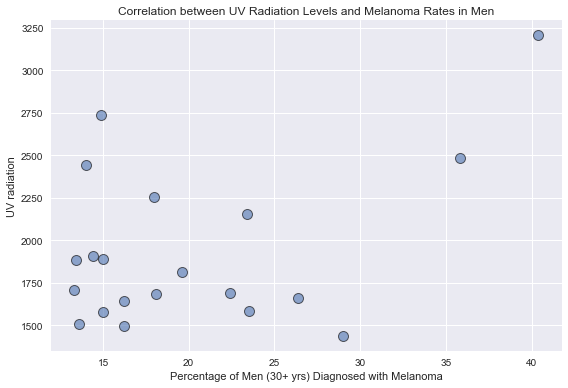

In [70]:
#Plot scatterplot to represent the Rates of Melanoma in Men in comparison to UV radiation

#Set plot stye to use a seaborn scatter plot 
plt.style.use('seaborn')  


#Read csv file to use data
data = pd.read_csv('MelanomaMen.csv')

#Instruct plot what data that will be used for X-axis and y-axis 
x = Melanoma_Men_Data
y = UVRadiation_Data

#Instruct plot of markersize, blending value, marker edgecolor, linewidth
#s is marker size and alpha is blending value
plt.scatter(x,y, s=100, alpha=0.6, edgecolor='black', linewidth=1)

#Set the plot title
plt.title('Correlation between UV Radiation Levels and Melanoma Rates in Men')

#Set the X-axis and y-axis labels
plt.xlabel('Percentage of Men (30+ yrs) Diagnosed with Melanoma')
plt.ylabel('UV radiation')

#Set plot to have tight layout
plt.tight_layout()

#Display plot
plt.show()

Here we are using matplotlib.pyplot to create a scatterplot. The x-value represents the percentage of men (30+yrs) that have been diagnosed with melanoma. The y-axis represents UV radiation levels. This plot can be compared with the p-value found earlier (5.829). 

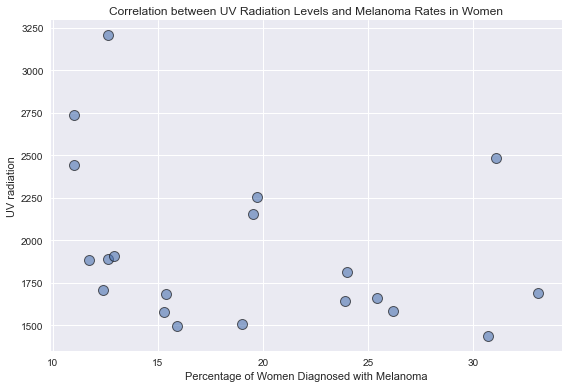

In [71]:
#Plot scatterplot to represent the Rates of Melanoma in Men in comparison to UV radiation

#Set plot stye to use a seaborn scatter plot 
plt.style.use('seaborn')  

#Read csv file to use data
data = pd.read_csv('MelanomaWomen.csv')

#Inform scatter plot what data that will be used for X-axis and y-axis 
x = Melanoma_Women_Data
y = UVRadiation_Data

#Instruct plot of markersize, blending value, marker edgecolor, linewidth
plt.scatter(x,y, s=100, alpha=0.6, edgecolor='black', linewidth=1)

#Set the plot title
plt.title('Correlation between UV Radiation Levels and Melanoma Rates in Women')

#Set the x-axis and y-axis labels
plt.xlabel('Percentage of Women Diagnosed with Melanoma')
plt.ylabel('UV radiation')

#Set plot to have tight layout
plt.tight_layout()

#Display plot
plt.show()


Here we are using matplotlib.pyplot to create a scatterplot. The x-value represents the percentage of women (30+yrs) that have been diagnosed with melanoma. The y-axis represents UV radiation levels. This plot can be compared with the p-value found earlier (2.869). 

## Part4: Analysis of the results
The first scatterplot illustrates that as the rate of melanoma increased among men, it did not necessarily mean there was high UV radiation in that location. For instance, at around 15% rate for melanoma, we see a UV radiation of about 1800. Later we see a 29% rate for melanoma, but a UV radiation level of around 1300. There is no correlation between the two variables which can be further supported by the p-value of 5.829 which is greater than the standard 0.05, which is not statistically significant.

For The second scatterplot had the same results where as the rate of melanoma increased, there was no real increase in UV radiation. This is further supported by the large p-value of 2.869 which is greater than the standard 0.05, which is not statistically significant. 

My hypothesis was not correct; there seems to be no significant correlation between high UV radiation levels and high melanoma rates in men and women.

### References
- Craig, Sarah et al. "Ultraviolet light and melanoma." The Journal of Pathology, vol. 244. 30 Jun. 2018. 
- D'Orazio, John et al. “UV radiation and the skin.” International journal of molecular sciences vol. 14,6 12222-48. 7 Jun. 2013, doi:10.3390/ijms140612222
- Heistein,Jonathan B. and Acharya, Utkarsh. "Malignant Melanoma". In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2021 Jan
- Liley, Ben J. and Mckenzie, Richard L. "Where on Earth has the highest UV?" National Institute of Water and Atmospheric Research. 2006.
- https://developers.google.com/public-data/docs/canonical/countries_csv
- https://gco.iarc.fr/causes/uv/tools-map?mode=1&sex=0&population=1&continent=0&cancer=0&key=paf&age_group=3
- https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
- https://www.wcrf.org/dietandcancer/skin-cancer-statistics/
- https://pythonforundergradengineers.com/statistics-in-python-using-the-statistics-module.html
- https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms
- https://www.tutorialspoint.com/python_data_science/python_p_value.htm
- https://plotly.com/python/choropleth-maps/
- https://apps.who.int/gho/data/view.main.35300
